In [1]:
install.packages("tidyverse")
install.packages("nycflights13")
library(tidyverse)
library(nycflights13)
options(repr.plot.width=7, repr.plot.height=4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts

# STATS 306
## Homework 3:  Advanced `dplyr` and tidy data

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Why so delayed? (4 points)
The following code adds a variable `week` to `flights`, such that `week==1` for the first seven days of the year, `week==2` for days 8-14, etc. (In the second half of the semester we will learn how to work with times and date data using the `lubridate` package.)

In [2]:
flights_week = mutate(flights, week=lubridate::week(time_hour))

**(a)** Make a bar plot of the proportion of flights each week whose actual departure time is NOT missing. The x-axis of your plot should contain the weeks of the year, ranging from 1 to 52, and the y-axis of your plot should be a number between 0 and 1 showing the decimal proportion of flights that have a departure time. What sort of plot geometry (line, bar, point, histogram, etc.) do you think is appropriate for this kind of plot? Does anything about this plot jump out at you? What and why? *1 point*

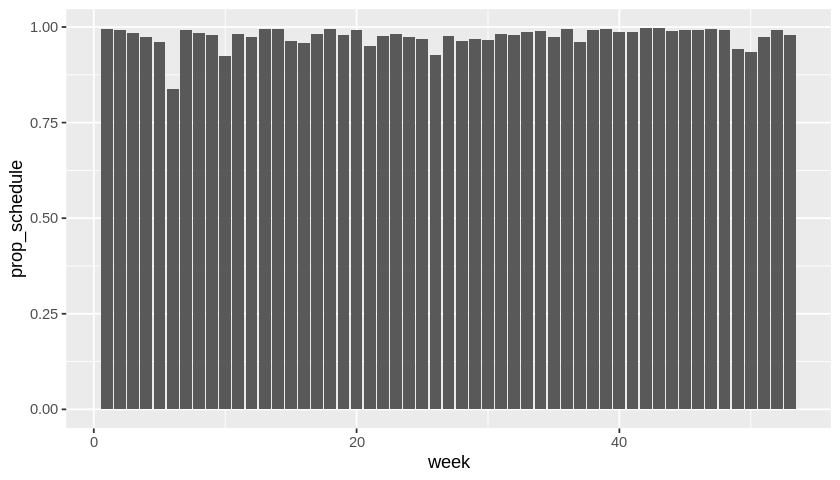

In [3]:
# Your solution here
#graph_not_miss <- flights_week %>% group_by(week) %>%
 # mutate(not_missing = ifelse(is.na(dep_time), 0, 1)) %>%
 # summarize(n=n(), not_missing = sum(not_missing, na.rm = TRUE)) %>% ggplot() +
 # geom_bar(mapping = aes(x = week, y = (not_missing/n)), stat = 'identity') +
 # xlab("Week Number") + ylab("Proportion of Flights That Have a Departure Time") +
  #ggtitle("Proportion of Flights Each Week Which Have a Departure Time") +
  #  scale_x_continuous(limits = c(1, 52))
#print(graph_not_miss)
flights_week %>% group_by(week) %>%
  summarize(prop_schedule = mean(!is.na(dep_time))) %>%
  ggplot() + geom_bar(aes(x=week, y=prop_schedule), stat="identity")

I plotted a bar plot which I think is the most appropriate for this kind of plot. Week 5 somewhat jumps out at me, since it appears that the proportion of flights that have a departure time is much less than all of the other weeks.

**(b)** For the week with the highest fraction of missing departure times, generate a table which shows the proportion of missing departure times for each day of that week. Your table should have columns `year`, `month`, `day`, and `prop_miss_dep_time`. Sort your table in chronological order and store it in a variable called `table1b`. *1 point*

In [4]:
# Your solution here
#tablex = flights_week %>% group_by(week) %>% 
 #   summarize(prop_miss_dep_time = (sum(is.na(dep_time))) / n()) %>% 
  #  ungroup %>% mutate(rank = dense_rank(desc(prop_miss_dep_time))) %>% 
  #  arrange(rank)
#table1b <- flights_week %>% group_by(week) %>% filter(week == 6) %>%
 # group_by(year, month, day) %>%
 # summarize(prop_miss_dep_time = (sum(is.na(dep_time))) / n()) %>% print

table1b <- flights_week %>% filter(week == 6) %>%
  group_by(year, month, day) %>% 
  summarize(prop_miss_dep_time = mean(is.na(dep_time)))
table1b

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,prop_miss_dep_time
<int>,<int>,<int>,<dbl>
2013,2,5,0.017857143
2013,2,6,0.008879023
2013,2,7,0.004291845
2013,2,8,0.507526882
2013,2,9,0.574561404
2013,2,10,0.031363088
2013,2,11,0.078579117


**(c)** 2 days in `table1b` should jump out at you. What you're discovering from the data is the [North American Blizzard of 2013](https://en.wikipedia.org/wiki/February_2013_North_American_blizzard). Many flights were cancelled due to extreme weather conditions. Identify the proportion of cancelled flights out of LaGuardia Airport (LGA) during the days that jumped out at you for each airline carrier in descending order. *1 point*

In [5]:
# Your solution here
#flights_week %>% group_by(month, day, carrier) %>% filter(month == 2 & (day == 8| day == 9) & origin == "LGA") %>%
 # group_by(carrier) %>% summarize(cancelled_flight_prop = (sum(is.na(dep_time)))/n()) %>% print
flights_week %>% filter(week == 6 & day %in% c(8, 9) & origin == "LGA") %>%
  group_by(carrier) %>%
  summarize(prop_miss_dep_time = mean(is.na(dep_time)))

carrier,prop_miss_dep_time
<chr>,<dbl>
9E,0.6666667
AA,0.4305556
B6,0.5000000
DL,0.6120690
EV,0.5000000
F9,0.5000000
FL,0.5238095
MQ,0.6000000
UA,0.5625000


**(d)** In your own words, summarize your findings from the previous exercises. Most importantly, comment on which airlines were the most and least cautious in terms of flight cancellations. Can you think of any reason why this might be? *1 point*

Shown above, American Airlines has the smallest proportion of cancelled flights during the blizzard, whereas Mesa Airlines had all of their flights cancelled that were coming out of LGA. Firstly, there were probably a lot more American Airlines flights than Mesa Airlines flights, which would cause American Airlines' proportion to be significantly smaller, as all of the flights could not have been cancelled. Also, since Mesa Airlines is mainly based in Arizona, the pilots may be less experienced in flying in blizzards, which therefore would cause the flights to get cancelled.

## Problem 2: Graduate school admissions (4 points)
This problem studies a built-in dataset called `UCBAdmissions`. It contains graduate school admissions data from 1973 for six departments at UC Berkeley:

In [6]:
data(UCBAdmissions)
ucb <- as_tibble(UCBAdmissions) %>% print

# A tibble: 24 × 4
   Admit    Gender Dept      n
   <chr>    <chr>  <chr> <dbl>
 1 Admitted Male   A       512
 2 Rejected Male   A       313
 3 Admitted Female A        89
 4 Rejected Female A        19
 5 Admitted Male   B       353
 6 Rejected Male   B       207
 7 Admitted Female B        17
 8 Rejected Female B         8
 9 Admitted Male   C       120
10 Rejected Male   C       205
# ℹ 14 more rows


(For privacy reasons the names of the departments have been changed to `A`, `B`, ... , `F`.)

**(a)**
Using the tool we learned for summarizing and manipulating tidy data, create a summary table from `ucb` which shows the acceptance rate by gender. Your table should have 5 columns: `Department`, `Gender`, `Admitted`, `Rejected`, and `Proportion Admitted`. Store it in a variable called `table3a`. *1 point*

<table>
<thead><tr><th scope="col">Department</th><th scope="col">Gender</th><th scope="col">Admitted</th><th scope="col">Rejected</th><th scope="col">Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
	<tr><td>A</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
		<tr><td>B</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
			<tr><td>B</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
				<tr><td>C</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
					<tr><td>C</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
						<tr><td>D</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
							<tr><td>D</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
								<tr><td>E</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>E</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
</tbody>
</table>

(A few entries have been provided for you; your job is to write code that will produce the complete table with no blanks.)

In [7]:
# Your solution here
#table3a <- ucb %>% group_by(Dept, Gender) %>% spread(key = Admit, value = n) %>%
 # summarize(Admitted = sum(Admitted), Rejected = sum(Rejected),
  #      `Proportion_Admitted` = Admitted / sum(Admitted, Rejected))
#print(table3a)
table2a <- ucb %>% group_by(Dept, Gender) %>%
  summarize(Admitted = n[Admit == "Admitted"], 
Rejected = n[Admit == "Rejected"],
Proportion_Admitted = Admitted/(Admitted + Rejected)) %>% print

`summarise()` has grouped output by 'Dept'. You can override using the
`.groups` argument.


# A tibble: 12 × 5
# Groups:   Dept [6]
   Dept  Gender Admitted Rejected Proportion_Admitted
   <chr> <chr>     <dbl>    <dbl>               <dbl>
 1 A     Female       89       19              0.824 
 2 A     Male        512      313              0.621 
 3 B     Female       17        8              0.68  
 4 B     Male        353      207              0.630 
 5 C     Female      202      391              0.341 
 6 C     Male        120      205              0.369 
 7 D     Female      131      244              0.349 
 8 D     Male        138      279              0.331 
 9 E     Female       94      299              0.239 
10 E     Male         53      138              0.277 
11 F     Female       24      317              0.0704
12 F     Male         22      351              0.0590


**(b)**
In STATS 250 you [learned](https://www.youtube.com/watch?v=6gfMhsWmnwk) how to test for differences in proportions between two populations. Apply this to part (a) `table3a`. Was the overall proportion of men admitted statistically different from that of women? Perform an appropriate test and interpret your findings. What do these result suggest about admissions practices at UC Berkeley in the early 1970s? *1 point*

(Hint: use the `prop.test()` function.)

In [8]:
# You solution here
#table3x <- ucb %>% group_by(Gender) %>% spread(key = Admit, value = n) %>% 
 # summarize(Admitted = sum(Admitted), Rejected = sum(Rejected), total = Admitted + Rejected)
#print(table3x)
#prop.test(x = c(557, 1198), n=c(1835, 2691))
table2b <- table2a %>%
  group_by(Dept, Gender) %>%
  summarize(Admitted = sum(Admitted),
Rejected = sum(Rejected),
Proportion_Admitted = Admitted/(Admitted + Rejected), .groups="drop")
prop.test(x=c(sum(table2b$Admitted[table2b$Gender == "Male"]),
sum(table2b$Admitted[table2b$Gender == "Female"])),
n=c(sum(ucb$n[ucb$Gender == "Male"]),
sum(ucb$n[ucb$Gender == "Female"])))


	2-sample test for equality of proportions with continuity correction

data:  c(sum(table2b$Admitted[table2b$Gender == "Male"]), sum(table2b$Admitted[table2b$Gender == "Female"])) out of c(sum(ucb$n[ucb$Gender == "Male"]), sum(ucb$n[ucb$Gender == "Female"]))
X-squared = 91.61, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1129887 0.1703022
sample estimates:
   prop 1    prop 2 
0.4451877 0.3035422 


**(c)**
Reproduce the table from Problem 1, but now stratify by department. 
Compute the male and female acceptance proportion for each department separately. *1 point*

Your resulting table should look like:


<table>
<thead><tr><th scope="col">Dept</th><th scope="col">Female_Admitted</th><th scope="col">Female_Rejected</th><th scope="col">Male_Admitted</th><th scope="col">Male_Rejected</th><th scope="col">Male_Proportion_Admitted</th><th scope="col">Female_Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A         </td><td> 89      </td><td> &dash;       </td><td>&dash;       </td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>B         </td><td> &dash;       </td><td>  &dash;       </td><td>353</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>C         </td><td> &dash;       </td><td>  391	     </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>D         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>0.33093525	</td><td>&dash;</td></tr>
	<tr><td>E         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>138       </td><td>&dash;</td><td>&dash;</td></tr>
 	<tr><td>F         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>0.07038123</td></tr>

</tbody>
</table>

(Again, a few table entries have been provided to help you check your work, and it is your job to provide code that computes the entire table automatically.)

In [ ]:
# Your solution here
table3a %>% unite(col = 'totals', Admitted: `Proportion_Admitted`) %>%
  spread(key = Gender, value = totals) %>%
  separate(Female, into = paste0('Female', 1:3), sep = '_') %>%
  separate(Male, into = paste0('Male', 1:3), sep = '_') %>%
  rename('Female_Admitted' = Female1, 'Female_Rejected' = Female2,
'Male_Admitted' = Male1, 'Male_Rejected' = Male2,
'Female_Proportion_Admitted' = Female3,
'Male_Proportion_Admitted' = Male3) %>%
  summarize(Dept, Female_Admitted, Female_Rejected, Male_Admitted, 
Male_Rejected, `Male_Proportion_Admitted`, `Female_Proportion_Admitted`) %>% print

# A tibble: 6 × 7
  Dept  Female_Admitted Female_Rejected Male_Admitted Male_Rej…¹ Male_…² Femal…³
  <chr> <chr>           <chr>           <chr>         <chr>      <chr>   <chr>  
1 A     89              19              512           313        0.6206… 0.8240…
2 B     17              8               353           207        0.6303… 0.68   
3 C     202             391             120           205        0.3692… 0.3406…
4 D     131             244             138           279        0.3309… 0.3493…
5 E     94              299             53            138        0.2774… 0.2391…
6 F     24              317             22            351        0.0589… 0.0703…
# … with abbreviated variable names ¹​Male_Rejected, ²​Male_Proportion_Admitted,
#   ³​Female_Proportion_Admitted


**(d)**
Do the department-level findings in part (c) agree or disagree with what you concluded in part (b)? Which departments agree with your conclusion in part (b) and which disagree? **Explain with numerical evidence for full credit.** *1 point*

In [ ]:
# Your solution here
# The department-level findings in part c, for the most part, agree with what I concluded in part b. Part b proved that the 
# there is very strong evidence that there is a difference in proportions between the female and male admitted. Also, part b provided
# a confidence interval of (-0.170, -0.113), which further means that there is a difference in proportions, but more so that
# the proportion of females admitted is greater than the proportion of males admitted. Adding to this evidence, departments A, B, D, 
# and F show that the female proportion admitted is greater than the male proportion admitted. For example, department A has an admitted
# female proportion of 0.824, whereas for male it is only 0.621. This further adds to the evidence that females having a greater 
# admitted proportion. However, departments C and D having a greater proportion for males than females, which disagrees with the 
# conclusion in part b. Despite these two departments, overall it seems that there is a difference between males and females admitted,
# and that the proportion for females is higher.

## Problem 3: Popular Baby Names of the Decade (2 points)
Recall from lecture the `babynames` dataset that contains a lot of information about frequency of baby names over time.

In [9]:
install.packages("babynames")
library(babynames)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**(a)** Generate a table that has **decade** on the vertical axis, and the most popular male **and** female name of each decade. A decade will be definied by the years ___0 - ___9. So for example, 1880-1889 is a decade followed by 1890-1899, etc. *1 point*

Hint: The `cut()` function can be used to "discretize" a continuous variable by placing each continuous observation into a bin. For example:

In [ ]:
v = 1:10  # vector of the numbers 1 through 10
cut(v, breaks=c(0, 5, 10))

[1] (0,5]  (0,5]  (0,5]  (0,5]  (0,5]  (5,10] (5,10] (5,10] (5,10] (5,10]
Levels: (0,5] (5,10]

converts the vector $v=(1, \dots, 10)$ into a *factor* (discrete variable) that has two levels: $(0,5]$ and $(5, 10]$.

In [10]:
# Your solution here
#year_decade <- list(list(1880, 1890, "1880s"), list(1890, 1899, "1890s"), list(1900, 1909, "1900s"), list(1910, 1919, "1910s"),
#list(1920, 1929, "1920s"), list(1930, 1939, "1930s"), list(1940, 1949, "1940s"), list(1950, 1959, "1950s"), list(1960, 1969, "1960s"),
#list(1970, 1979, "1970s"), list(1980, 1989, "1980s"), list(1990, 1999, "1990s"), list(2000, 2009, "2000s"), list(2010, 2019, "2010s"))
#babynames$decades = NA
#for(value in year_decade){
 # babynames$decades[babynames$year >= value[[1]] & babynames$year <= value[[2]]] = value[[3]]
#}
#most_popular <- babynames %>% group_by(decades, sex) %>% filter(n == max(n, na.rm=TRUE))
#print(most_popular)
br <- seq(1800, 2049, 10)
babynames_of_the_decade <- babynames %>%
  mutate(decade=cut(year, breaks=br, labels=head(paste0(br, "-", br + 9), -1), right=F)) %>%
  count(name, sex, decade, wt = n) %>% group_by(sex, decade) %>% top_n(1) %>%
  select(decade, sex, name) %>% pivot_wider(names_from=sex, values_from=name) %>%
  arrange(decade) %>%
  print

Selecting by n


# A tibble: 14 × 3
# Groups:   decade [14]
   decade    F        M      
   <fct>     <chr>    <chr>  
 1 1880-1889 Mary     John   
 2 1890-1899 Mary     John   
 3 1900-1909 Mary     John   
 4 1910-1919 Mary     John   
 5 1920-1929 Mary     Robert 
 6 1930-1939 Mary     Robert 
 7 1940-1949 Mary     James  
 8 1950-1959 Mary     James  
 9 1960-1969 Lisa     Michael
10 1970-1979 Jennifer Michael
11 1980-1989 Jessica  Michael
12 1990-1999 Jessica  Michael
13 2000-2009 Emily    Jacob  
14 2010-2019 Emma     Noah   


**(b)** Do any names appear more than once? Write code that converts the table from part (a) into a dataframe with all the names that show up more than once. **Manual answers will not receive credit. Your code should automatically convert the table to a new one showing the duplicated names.** *1 point*

In [11]:
# Your solution here
#new_df <- most_popular %>% group_by(name) %>% count(name) %>% filter(n>1)
#print(new_df)
repeat_female_names <- babynames_of_the_decade %>% 
  group_by(F) %>% filter(n() > 1) %>%
    select(F) %>% unique %>% print
repeat_male_names <- babynames_of_the_decade %>%
  group_by(M) %>% filter(n() > 1) %>% select(M) %>% unique %>% print

# A tibble: 2 × 1
# Groups:   F [2]
  F      
  <chr>  
1 Mary   
2 Jessica
# A tibble: 4 × 1
# Groups:   M [4]
  M      
  <chr>  
1 John   
2 Robert 
3 James  
4 Michael
